## Importing FastAI

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from fastbook import *

## Running or Swimming Model

In [27]:
urls = search_images_ddg('swimming photos', max_images=1)
len(urls), urls[0]

(1,
 'https://www.gannett-cdn.com/-mm-/f630273a5c3db7a81f92e515911a16e214f83f76/c=0-84-3048-1806/local/-/media/2018/03/03/Bergen/Morristown/636557049684427281-030318girlsswimming-0293.jpg?width=3200&height=1680&fit=crop')

In [28]:
dest = Path('swimming.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=True)

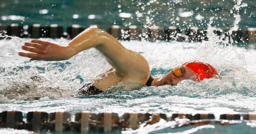

In [29]:
im = Image.open(dest)
im.to_thumb(256, 256)

In [31]:
searches = 'swimming','running'
path = Path('swimming_or_not')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images_ddg(f'person {o} photo'))
  resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [32]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

13

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


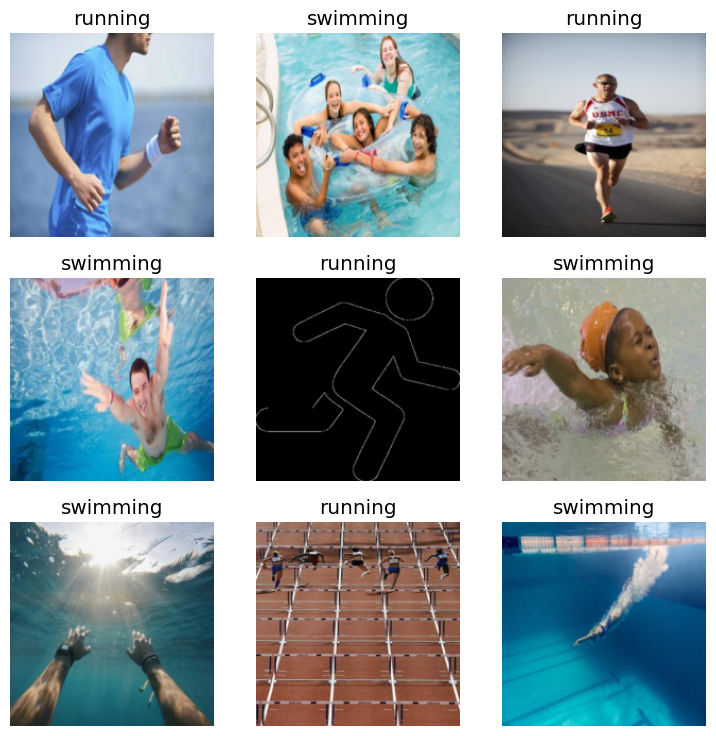

In [33]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=9)

In [34]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 117MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.615555,0.099554,0.036866,03:27


epoch,train_loss,valid_loss,error_rate,time
0,0.100849,0.056233,0.027650,05:00
1,0.059388,0.032009,0.013825,05:05
2,0.041425,0.010702,0.000000,05:00
3,0.027802,0.016419,0.009217,05:05
4,0.020041,0.019648,0.009217,05:04


In [35]:
is_swimming,_,probs = learn.predict(PILImage.create('swimming.jpg'))
print(f"This is {is_swimming}.")
print(f"Probability this is swimming: {probs[1]:.3f}")

This is swimming.
Probability this is swimming: 1.000
